# Visual Area Segmentation

In [10]:
import numpy as np
import sys
sys.path.append('../src')
import physion.utils.plot_tools as pt
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt

In [3]:
maps = np.load('/Users/yann/UNPROCESSED/CIBELE/2024_06_28/12-36-46/raw-maps.npy', allow_pickle=True).item()

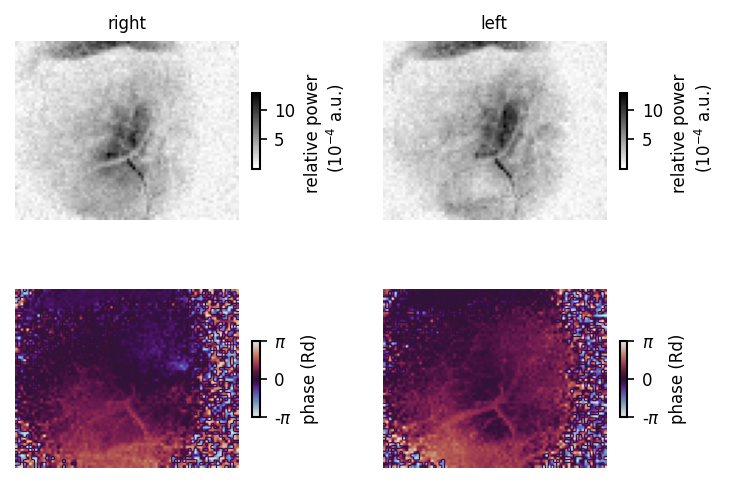

In [3]:
fig, AX = pt.figure(axes=(2,2), figsize=(1.5,2), hspace=0.5, wspace=0.5)

for p, direction in enumerate(['right', 'left']):
    plot_power_map(AX[0][p], fig, maps['%s-power' % direction])
    plot_phase_map(AX[1][p], fig, maps['%s-phase' % direction])
    AX[0][p].set_title(direction)
for ax in pt.flatten(AX):
    ax.axis('off')

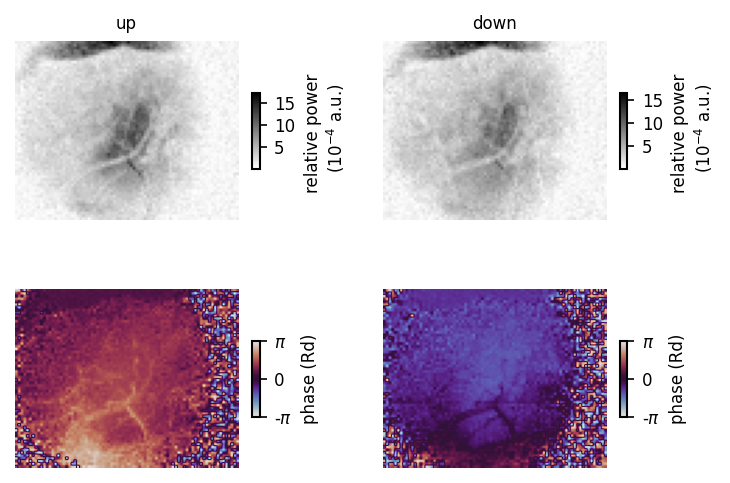

In [4]:
fig, AX = pt.figure(axes=(2,2), figsize=(1.5,2), hspace=0.5, wspace=0.5)

for p, direction in enumerate(['up', 'down']):
    plot_power_map(AX[0][p], fig, maps['%s-power' % direction])
    plot_phase_map(AX[1][p], fig, maps['%s-phase' % direction])
    AX[0][p].set_title(direction)
for ax in pt.flatten(AX):
    ax.axis('off')

0.18062980540125043


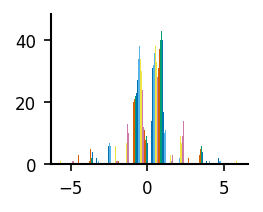

In [5]:
phase_diff = maps['left-phase']-maps['right-phase']
print(np.mean(phase_diff))
#phase_diff = maps['right-phase']-maps['left-phase']
#print(np.mean(phase_diff))

_ = plt.hist(phase_diff)

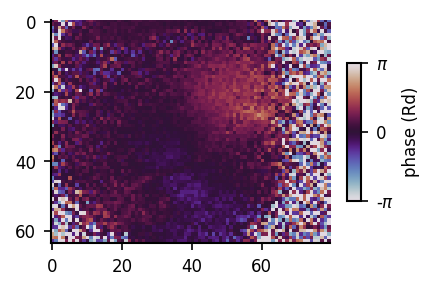

In [6]:
fig, ax = plt.subplots(figsize=(3,3))

map_type = 'altitude'
#im = ax.imshow(maps['%s-retinotopy' % map_type], cmap=plt.cm.PRGn)
plot_phase_map(ax, fig, phase_diff)

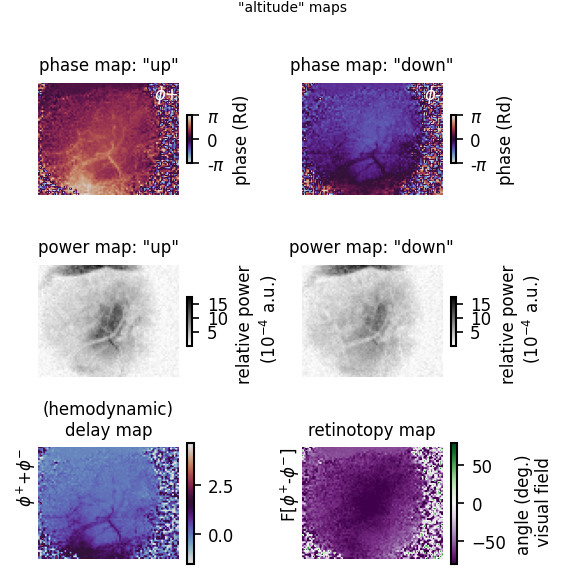

In [7]:
plot_retinotopic_maps(maps, map_type='altitude');

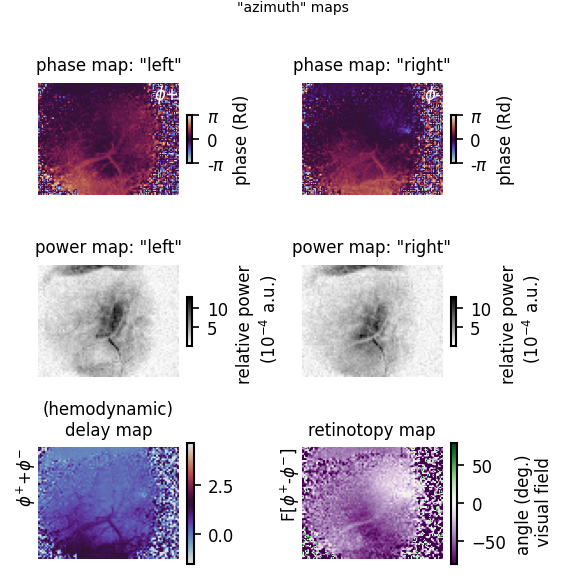

In [8]:
plot_retinotopic_maps(maps, map_type='azimuth');

In [20]:
params = build_trial_data(maps)
default_segmentation_params={'phaseMapFilterSigma': 1.,
                             'signMapFilterSigma': 1.,
                             'signMapThr': 0.5,
                             'eccMapFilterSigma': 10.,
                             'splitLocalMinCutStep': 5.,
                             'mergeOverlapThr': 0.1,
                             'closeIter': 3,
                             'openIter': 3,
                             'dilationIter': 15,
                             'borderWidth': 1,
                             'smallPatchThr': 100,
                             'visualSpacePixelSize': 0.5,
                             'visualSpaceCloseIter': 15,
                             'splitOverlapThr': 1.1}
trial = RetinotopicMapping.RetinotopicMappingTrial(**params)

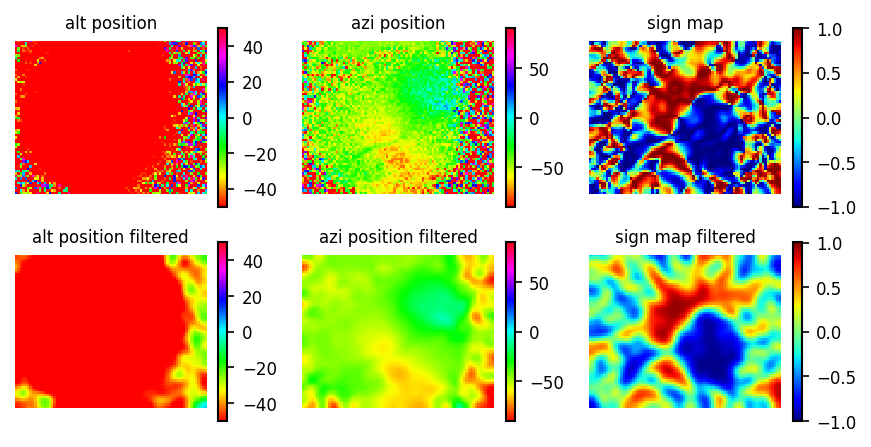

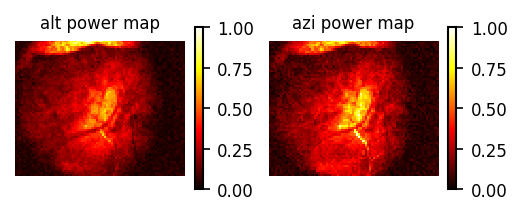

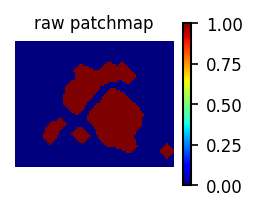

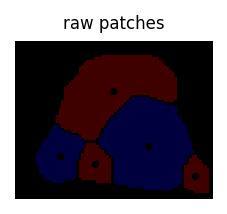

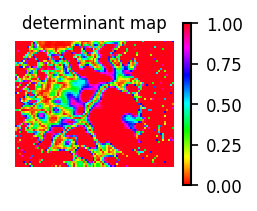

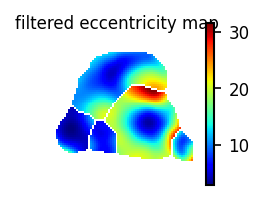

patch01AU=176.0 AS=2209.970280244398 ratio=12.556649319570443
2 local minuma were found!!!
patch02AU=0.0 AS=696.8426740613894 ratio=inf
Only one local minumum was found!!!
patch03AU=0.0 AS=163.0269721076947 ratio=inf
Only one local minumum was found!!!
patch04AU=0.0 AS=187.44100111829283 ratio=inf
Only one local minumum was found!!!
patch05AU=476.0 AS=1451.590414894316 ratio=3.049559695156126
Only one local minumum was found!!!


/Users/yann/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/yann/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/yann/work/physion/notebooks/../src/physion/intrinsic/RetinotopicMapping.py:1264: RuntimeWarning: divide by zero encountered in scalar divide
  print(key + 'AU=' + str(AU) + ' AS=' + str(AS) + ' ratio=' + str(AS / AU))
/Users/yann/work/physion/notebooks/../src/physion/intrinsic/RetinotopicMapping.py:1266: RuntimeWarning: divide by zero encountered in scalar divide
  if AS / AU >= splitOverlapThr:


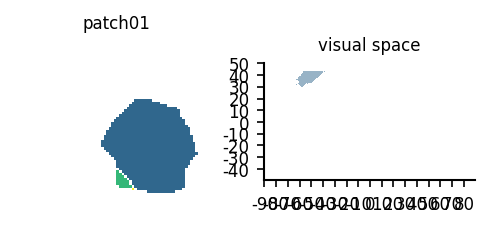

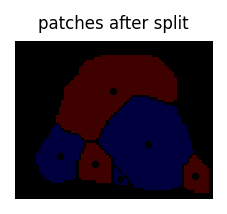

merge iteration: 1


/Users/yann/work/physion/notebooks/../src/physion/intrinsic/RetinotopicMapping.py:1430: RuntimeWarning: invalid value encountered in scalar divide
  overlapRatio1 = Aoverlap / AU1
/Users/yann/work/physion/notebooks/../src/physion/intrinsic/RetinotopicMapping.py:1431: RuntimeWarning: invalid value encountered in scalar divide
  overlapRatio2 = Aoverlap / AU2


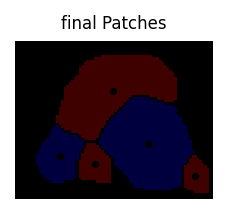

In [18]:
import numpy as np
import sys
sys.path.append('../src')
import physion.utils.plot_tools as pt
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt

maps = np.load('/Users/yann/UNPROCESSED/CIBELE/2024_06_28/12-36-46/raw-maps.npy', allow_pickle=True).item()

data = build_trial_data(maps)
segmentation_params={'phaseMapFilterSigma': 2.,
                     'signMapFilterSigma': 2.,
                     'signMapThr': 0.5,
                     'eccMapFilterSigma': 10.,
                     'splitLocalMinCutStep': 5.,
                     'mergeOverlapThr': 0.1,
                     'closeIter': 3,
                     'openIter': 3,
                     'dilationIter': 15,
                     'borderWidth': 1,
                     'smallPatchThr': 100,
                     'visualSpacePixelSize': 0.5,
                     'visualSpaceCloseIter': 15,
                     'splitOverlapThr': 1.1}
data['params'] = segmentation_params
trial = RetinotopicMapping.RetinotopicMappingTrial(**data)
trial.processTrial(isPlot=True)

In [1]:
import numpy as np
import sys
sys.path.append('../src')
import physion.utils.plot_tools as pt
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt
data = np.load('/Users/yann/UNPROCESSED/CIBELE/2024_06_28/12-36-46/RetinotopicMappingData.npy', allow_pickle=True).item()
trial = RetinotopicMapping.RetinotopicMappingTrial(**data)

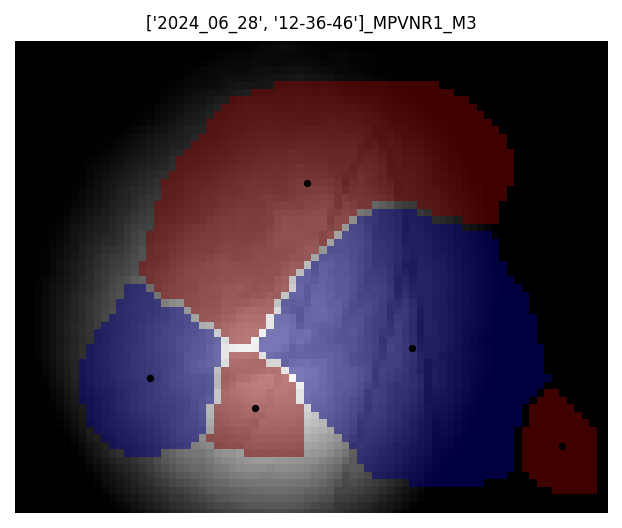

In [12]:
fig, ax = pt.figure(figsize=(5,5))
fig = trial.plotFinalPatches(plotAxis=ax)

In [5]:
fig